In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from dask_image import imread, ndfilters, ndmeasure
from dask_ml.cluster import KMeans
import dask.array as da
import numpy as np

In [3]:
from dask.distributed import Client

client = Client(n_workers=6, threads_per_worker=2, memory_limit="8GB", processes=True, interface='lo')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 12,Total memory: 44.70 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44363,Workers: 6
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 44.70 GiB
Comm: tcp://127.0.0.1:40825,Total threads: 2
Dashboard: http://127.0.0.1:35619/status,Memory: 7.45 GiB
Nanny: tcp://127.0.0.1:45335,


In [4]:
subfolder = '/mnt/d/Google Drive/Guitar/GGBO/media_2023/Timelapses/Aqua/all'

In [5]:
baseline = imread.imread(f"{subfolder}/100_DSC_0105.JPG").compute()

In [6]:
baseline

array([[[[146, 138,  99],
         [147, 139, 102],
         [147, 139, 102],
         ...,
         [181,  78,  35],
         [182,  79,  36],
         [187,  84,  41]],

        [[146, 138,  99],
         [146, 138,  99],
         [146, 138,  99],
         ...,
         [182,  77,  32],
         [181,  76,  31],
         [184,  79,  34]],

        [[144, 136,  97],
         [143, 135,  96],
         [145, 137,  98],
         ...,
         [181,  76,  31],
         [181,  76,  31],
         [181,  76,  31]],

        ...,

        [[167,  45,   0],
         [167,  45,   0],
         [164,  42,   0],
         ...,
         [ 68,  39,  25],
         [ 66,  37,  23],
         [ 66,  37,  23]],

        [[167,  46,   0],
         [168,  46,   0],
         [165,  43,   0],
         ...,
         [ 72,  43,  29],
         [ 67,  38,  24],
         [ 66,  37,  23]],

        [[166,  44,   0],
         [166,  44,   0],
         [166,  44,   0],
         ...,
         [ 67,  38,  24],
        

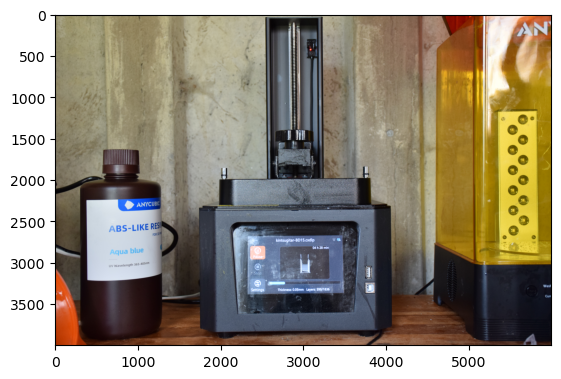

In [7]:
plt.imshow(baseline[0])

In [8]:
baseline[0,1990:2010,2090:2110].shape

(20, 20, 3)

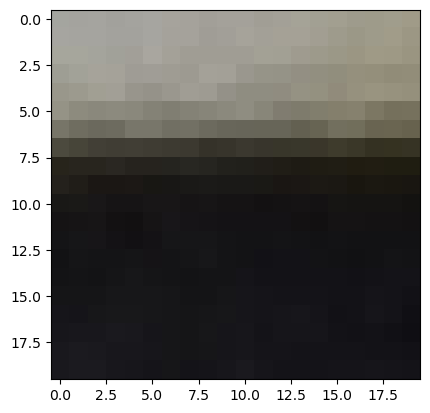

In [9]:
plt.imshow(baseline[0,1990:2010,2090:2110])

In [10]:
def grayscale(rgb):
    result = ((rgb[..., 0] * 0.2125) +
              (rgb[..., 1] * 0.7154) +
              (rgb[..., 2] * 0.0721))
    return result

In [11]:
def reduce_to_20x20(im):
    reduced = im[:,1990:2010,2090:2110]
    return da.array(reduced)

In [12]:
def smooth(im):
    return ndfilters.gaussian_filter(im, sigma=[0,1,1])

In [13]:
def get_threshold(im):
    threshold_value = 0.5 * da.max(im)
    return im > threshold_value

In [14]:
def compare_to_baseline(b,i):
    return da.subtract(i,b)

# Repeat with random baseline images

## use dask_ml.cluster.KMeans

In [15]:
baseline.shape

(1, 4000, 6000, 3)

In [16]:
gray_baseline = da.array(grayscale(baseline))
gray_baseline

dask.array<array, shape=(1, 4000, 6000), dtype=float64, chunksize=(1, 4000, 4194), chunktype=numpy.ndarray>

In [17]:
smoothed_baseline = smooth(gray_baseline).compute()
smoothed_baseline

/home/dave/miniconda3/envs/py309/lib/python3.9/site-packages/distributed/client.py:3106: UserWarning: Sending large graph of size 183.11 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


array([[[137.01945413, 137.24789481, 137.349715  , ...,  96.65053115,
          97.88014928,  99.40859352],
        [136.48733138, 136.61835419, 136.73535536, ...,  95.82564923,
          96.64158835,  97.59896913],
        [136.12521685, 136.24442884, 136.32426906, ...,  95.19190268,
          95.54629496,  95.89994709],
        ...,
        [ 67.76807603,  67.29450188,  66.88972522, ...,  43.47178439,
          42.92000477,  42.54583221],
        [ 67.61977297,  67.23144613,  66.75605034, ...,  43.54363916,
          42.99085083,  42.40244874],
        [ 67.25890388,  67.06037993,  66.83177614, ...,  42.83612435,
          42.56332549,  42.19529761]]])

In [18]:
high_contrast_baseline = get_threshold(smoothed_baseline)

In [19]:
tbt = reduce_to_20x20(high_contrast_baseline)
# del baseline
tbt.shape

(1, 20, 20)

In [20]:
tbt.compute()

array([[[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         False, False, False, False, False, False, False, False, False,
         False, 

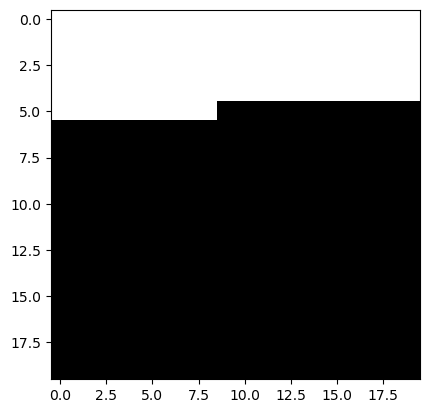

In [21]:
plt.imshow(tbt[0],cmap='gray')

In [22]:
all_full = imread.imread(f"{subfolder}/*.JPG")

In [23]:
# all_full.visualize()

In [24]:
all_full

dask.array<_map_read_frame, shape=(1592, 4000, 6000, 3), dtype=uint8, chunksize=(1, 4000, 6000, 3), chunktype=numpy.ndarray>

In [25]:
# fig, ax = plt.subplots(nrows=2, ncols=2)
# ax[0,0].imshow(all_full[0])
# ax[0,1].imshow(all_full[1])
# ax[1,0].imshow(all_full[2])
# ax[1,1].imshow(all_full[3])
# plt.show()

In [26]:
tbt_all = reduce_to_20x20(all_full)
tbt_all

dask.array<getitem, shape=(1592, 20, 20, 3), dtype=uint8, chunksize=(1, 20, 20, 3), chunktype=numpy.ndarray>

In [27]:
tbt_all.persist()

dask.array<getitem, shape=(1592, 20, 20, 3), dtype=uint8, chunksize=(1, 20, 20, 3), chunktype=numpy.ndarray>

In [28]:
# tbt_all.visualize()

In [29]:
# fig, ax = plt.subplots(nrows=5, ncols=5)
# k=200
# for i in range(5):
#     for j in range(5):
#         ax[i,j].imshow(tbt_all[k])
#         k+=1
# plt.show()

In [30]:
grays = grayscale(tbt_all)
grays

dask.array<add, shape=(1592, 20, 20), dtype=float64, chunksize=(1, 20, 20), chunktype=numpy.ndarray>

In [31]:
# fig, ax = plt.subplots(nrows=5, ncols=5)
# k=200
# for i in range(5):
#     for j in range(5):
#         ax[i,j].imshow(grays[k],cmap='gray')
#         k+=1
# plt.show()

In [32]:
smoothed = smooth(grays)
smoothed

dask.array<_trim, shape=(1592, 20, 20), dtype=float64, chunksize=(1, 20, 20), chunktype=numpy.ndarray>

In [33]:
# fig, ax = plt.subplots(nrows=5, ncols=5)
# k=200
# for i in range(5):
#     for j in range(5):
#         ax[i,j].imshow(smoothed[k],cmap='gray')
#         k+=1
# plt.show()

In [34]:
high_contrast = get_threshold(smoothed)
high_contrast

dask.array<gt, shape=(1592, 20, 20), dtype=bool, chunksize=(1, 20, 20), chunktype=numpy.ndarray>

In [35]:
# fig, ax = plt.subplots(nrows=5, ncols=5)
# k=200
# for i in range(5):
#     for j in range(5):
#         ax[i,j].imshow(high_contrast[k],cmap='gray')
#         k+=1
# plt.show()

In [36]:
high_contrast.compute()

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

2023-06-06 22:18:16,502 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-06-06 22:18:27,663 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-06-06 22:18:29,033 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-06-06 22:18:30,041 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-06-06 22:18:42,242 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-06-06 22:18:43,062 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-06-06 22:18:55,368 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-06-06 22:18:56,176 - distributed.utils_perf - WARNING - full garbage collections took

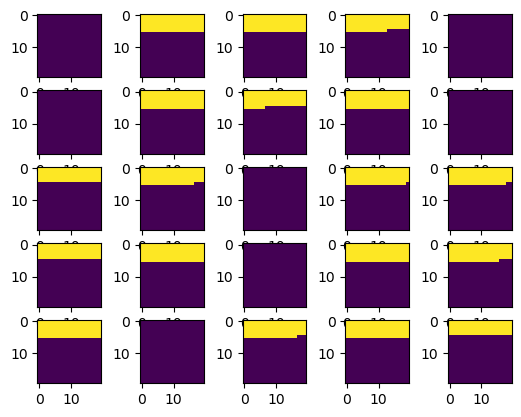

In [37]:
fig, ax = plt.subplots(nrows=5, ncols=5)
k=200
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(high_contrast[k],cmap='viridis')
        k+=1
plt.show()

In [38]:
kmeans = KMeans(n_clusters=2)

In [40]:
high_contrast.shape

(1592, 20, 20)

In [48]:
high_contrast = high_contrast.reshape((1592,20*20))
high_contrast.persist()

dask.array<reshape, shape=(1592, 400), dtype=bool, chunksize=(1, 400), chunktype=numpy.ndarray>

In [ ]:
# kmeans.fit(high_contrast)

2023-06-06 22:47:43,635 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-06-06 22:49:58,568 - tornado.application - ERROR - Exception in callback <bound method BokehTornado._keep_alive of <bokeh.server.tornado.BokehTornado object at 0x7fd1c2912670>>
Traceback (most recent call last):
  File "/home/dave/miniconda3/envs/py309/lib/python3.9/site-packages/tornado/ioloop.py", line 921, in _run
    val = self.callback()
  File "/home/dave/miniconda3/envs/py309/lib/python3.9/site-packages/bokeh/server/tornado.py", line 760, in _keep_alive
    c.send_ping()
  File "/home/dave/miniconda3/envs/py309/lib/python3.9/site-packages/bokeh/server/connection.py", line 93, in send_ping
    self._socket.ping(str(self._ping_count).encode("utf-8"))
  File "/home/dave/miniconda3/envs/py309/lib/python3.9/site-packages/tornado/websocket.py", line 444, in ping
    raise WebSocketClosedError()
tornado.websocket.WebSocketClosedError
2023-06-06 22:50:47